<a href="https://colab.research.google.com/github/ValentinaCorredor/Taller-finanzas-computacionales/blob/main/Taller3_Calder%C3%B3n_y_Corredor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Importamos librerias
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
import statsmodels.api as sm
import warnings
warnings.filterwarnings("ignore")
%pip install --quiet yfinance
import yfinance as yf
import pandas_datareader.data as wb
from statsmodels.tsa.api import acf, pacf, graphics
from statsmodels.graphics.tsaplots import plot_acf
!pip install --quiet pyDOE
from pyDOE import lhs

Punto 1. Escoja 5 acciones del índice Dow Jones con 5 años históricos a cierre de diciembre de 2022 y una periodicidad mensual.

In [ ]:
assets=("JPM","MA","TSLA","MSFT","MMM")
p=yf.download(assets,start="2017-12-01",end="2022-12-31",interval="1Mo")["Adj Close"]
ret=np.log(p/p.shift()).dropna()
pi=yf.download("^DJI",start="2017-12-01",end="2022-12-31",interval="1Mo")["Adj Close"]
reti=np.log(pi/pi.shift()).dropna()
reti=pd.DataFrame(reti)
rm=reti.mean()
p_tbills=yf.download("^TYX",start="2017-12-01",end="2022-12-31",interval="1Mo")["Adj Close"]
ret_bills=np.log(p_tbills/p_tbills.shift()).dropna()

[*********************100%***********************]  5 of 5 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


a. Estimar parámetros del modelo con las cinco acciones y construir un DataFrame con:  retornos esperados, volatilidades, betas, retornos estimados (CAPM), coeficiente de determinación de cada uno.

In [ ]:
#Retornos esperados
retornos=ret.mean()
retornos=pd.DataFrame(retornos)
retornos.columns=["Retornos"]
retornos

,Retornos
JPM,0.006188
MA,0.014314
MMM,-0.008428
MSFT,0.018183
TSLA,0.029680


In [ ]:
#Volatilidades
sigma=ret.std()
sigma=pd.DataFrame(sigma)
sigma.columns=["Volatilidades"]
sigma



,Volatilidades
JPM,0.080254
MA,0.080658
MMM,0.069501
MSFT,0.061457
TSLA,0.196036


In [ ]:
X = reti
Y = ret["JPM"]
X = sm.add_constant(X)
model = sm.OLS(Y, X).fit()
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:                    JPM   R-squared:                       0.657
Model:                            OLS   Adj. R-squared:                  0.651
Method:                 Least Squares   F-statistic:                     111.2
Date:                Sat, 29 Apr 2023   Prob (F-statistic):           4.20e-15
Time:                        00:31:19   Log-Likelihood:                 98.836
No. Observations:                  60   AIC:                            -193.7
Df Residuals:                      58   BIC:                            -189.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0003      0.006      0.041      0.9

In [ ]:
BJPM=model.params[1]
BJPM

1.2135576147689058

In [ ]:
X = reti
Y = ret["MSFT"]
X = sm.add_constant(X)
model1 = sm.OLS(Y, X).fit()
print(model1.summary())


                            OLS Regression Results                            
Dep. Variable:                   MSFT   R-squared:                       0.505
Model:                            OLS   Adj. R-squared:                  0.497
Method:                 Least Squares   F-statistic:                     59.29
Date:                Sat, 29 Apr 2023   Prob (F-statistic):           1.95e-10
Time:                        00:31:19   Log-Likelihood:                 103.86
No. Observations:                  60   AIC:                            -203.7
Df Residuals:                      58   BIC:                            -199.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0142      0.006      2.512      0.0

In [ ]:
BMSFT=model1.params[1]
BMSFT

0.8150540691400543

In [ ]:
X = reti
Y = ret["TSLA"]
X = sm.add_constant(X)
model2 = sm.OLS(Y, X).fit()
print(model2.summary())


                            OLS Regression Results                            
Dep. Variable:                   TSLA   R-squared:                       0.175
Model:                            OLS   Adj. R-squared:                  0.160
Method:                 Least Squares   F-statistic:                     12.27
Date:                Sat, 29 Apr 2023   Prob (F-statistic):           0.000894
Time:                        00:31:19   Log-Likelihood:                 18.892
No. Observations:                  60   AIC:                            -33.78
Df Residuals:                      58   BIC:                            -29.59
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0222      0.023      0.954      0.3

In [ ]:
BTSLA=model2.params[1]
BTSLA

1.5279440958245827

In [ ]:
X = reti
Y = ret["MMM"]
X = sm.add_constant(X)
model3 = sm.OLS(Y, X).fit()
print(model3.summary())


                            OLS Regression Results                            
Dep. Variable:                    MMM   R-squared:                       0.633
Model:                            OLS   Adj. R-squared:                  0.627
Method:                 Least Squares   F-statistic:                     100.2
Date:                Sat, 29 Apr 2023   Prob (F-statistic):           2.98e-14
Time:                        00:31:19   Log-Likelihood:                 105.46
No. Observations:                  60   AIC:                            -206.9
Df Residuals:                      58   BIC:                            -202.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0135      0.006     -2.449      0.0

In [ ]:
BMMM=model3.params[1]
BMMM

1.0318076693043556

In [ ]:
X = reti
Y = ret["MA"]
X = sm.add_constant(X)
model4 = sm.OLS(Y, X).fit()
print(model4.summary())

                            OLS Regression Results                            
Dep. Variable:                     MA   R-squared:                       0.585
Model:                            OLS   Adj. R-squared:                  0.578
Method:                 Least Squares   F-statistic:                     81.89
Date:                Sat, 29 Apr 2023   Prob (F-statistic):           1.10e-12
Time:                        00:31:19   Log-Likelihood:                 92.832
No. Observations:                  60   AIC:                            -181.7
Df Residuals:                      58   BIC:                            -177.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0087      0.007      1.279      0.2

In [ ]:
BMA=model4.params[1]
BMA

1.1511231703669238

In [ ]:
#Betas
betas=pd.DataFrame([BJPM,BMA,BMMM,BMSFT,BTSLA])
betas.index=(["JPM","MA","MMM","MSFT","TSLA"])
betas.columns=["Beta"]
betas

,Beta
JPM,1.213558
MA,1.151123
MMM,1.031808
MSFT,0.815054
TSLA,1.527944


In [ ]:
#Retornos CAPM
CAPMJPM=BJPM*rm
CAPMMA=BMA*rm
CAPMMMM=BMMM*rm
CAPMMSFT=BMSFT*rm
CAPMTSLA=BTSLA*rm
CAPM=pd.DataFrame([CAPMJPM,CAPMMA,CAPMMMM,CAPMMSFT,CAPMTSLA])
CAPM.index=(["JPM","MA","MMM","MSFT","TSLA"])
CAPM.columns=["CAPM"]
CAPM

,CAPM
JPM,0.005934
MA,0.005629
MMM,0.005045
MSFT,0.003985
TSLA,0.007471


In [ ]:
#Coeficiente de determinación ##Trabajo con el normal o con el ajustado
#Ajustado
RJPM=model.rsquared_adj
RMSFT=model1.rsquared_adj
RTSLA=model2.rsquared_adj
RMMM=model3.rsquared_adj
RMA=model4.rsquared_adj
RSQR=pd.DataFrame([RJPM,RMA,RMMM,RMSFT,RTSLA])
RSQR.index=(["JPM","MA","MMM","MSFT","TSLA"])
RSQR.columns=["R squared adjusted"]
RSQR

,R squared adjusted
JPM,0.651250
MA,0.578226
MMM,0.627117
MSFT,0.496960
TSLA,0.160361


b. Construya plano riesgo retorno con los betas de los activos y los retornos del CAPM

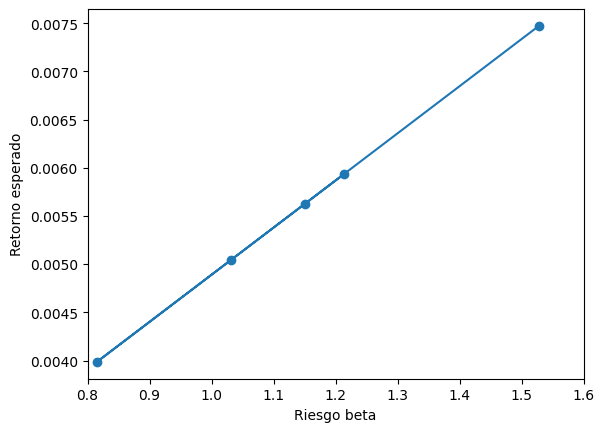

In [ ]:
plt.plot(betas, CAPM, 'o-')
plt.ylabel("Retorno esperado")
plt.xlabel("Riesgo beta")
plt.xlim(0.8,1.6)
plt.show();

c. Calcular betas con modelo Fama French

In [ ]:
datos=pd.read_excel("datosFF.xlsx")
datos.index=ret.index


In [ ]:
variables = pd.concat([datos['Mkt-RF'],datos['SMB'],datos['HML']],axis=1)
variables=variables/100

In [ ]:
#Betas JPM con FF
X=variables
Y=ret["JPM"]
X = sm.add_constant(X)
modelo = sm.OLS(Y, X).fit()
print(modelo.summary())


                            OLS Regression Results                            
Dep. Variable:                    JPM   R-squared:                       0.788
Model:                            OLS   Adj. R-squared:                  0.776
Method:                 Least Squares   F-statistic:                     69.23
Date:                Sat, 29 Apr 2023   Prob (F-statistic):           7.76e-19
Time:                        00:31:20   Log-Likelihood:                 113.21
No. Observations:                  60   AIC:                            -218.4
Df Residuals:                      56   BIC:                            -210.0
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0014      0.005     -0.292      0.7

In [ ]:
#Betas MSFT con FF
X=variables
Y=ret["MSFT"]
X = sm.add_constant(X)
modelo1 = sm.OLS(Y, X).fit()
print(modelo1.summary())

                            OLS Regression Results                            
Dep. Variable:                   MSFT   R-squared:                       0.773
Model:                            OLS   Adj. R-squared:                  0.761
Method:                 Least Squares   F-statistic:                     63.64
Date:                Sat, 29 Apr 2023   Prob (F-statistic):           4.85e-18
Time:                        00:31:20   Log-Likelihood:                 127.24
No. Observations:                  60   AIC:                            -246.5
Df Residuals:                      56   BIC:                            -238.1
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0106      0.004      2.691      0.0

In [ ]:
#Betas TSLA con FF
X=variables
Y=ret["TSLA"]
X = sm.add_constant(X)
modelo2 = sm.OLS(Y, X).fit()
print(modelo2.summary())

                            OLS Regression Results                            
Dep. Variable:                   TSLA   R-squared:                       0.339
Model:                            OLS   Adj. R-squared:                  0.304
Method:                 Least Squares   F-statistic:                     9.578
Date:                Sat, 29 Apr 2023   Prob (F-statistic):           3.35e-05
Time:                        00:31:20   Log-Likelihood:                 25.560
No. Observations:                  60   AIC:                            -43.12
Df Residuals:                      56   BIC:                            -34.74
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0147      0.021      0.690      0.4

In [ ]:
#Betas MMM con FF
X=variables
Y=ret["MMM"]
X = sm.add_constant(X)
modelo3 = sm.OLS(Y, X).fit()
print(modelo3.summary())

                            OLS Regression Results                            
Dep. Variable:                    MMM   R-squared:                       0.583
Model:                            OLS   Adj. R-squared:                  0.560
Method:                 Least Squares   F-statistic:                     26.06
Date:                Sat, 29 Apr 2023   Prob (F-statistic):           1.10e-10
Time:                        00:31:20   Log-Likelihood:                 101.57
No. Observations:                  60   AIC:                            -195.1
Df Residuals:                      56   BIC:                            -186.8
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0155      0.006     -2.580      0.0

In [ ]:
#Betas MA con FF
X=variables
Y=ret["MA"]
X = sm.add_constant(X)
modelo4 = sm.OLS(Y, X).fit()
print(modelo4.summary())

                            OLS Regression Results                            
Dep. Variable:                     MA   R-squared:                       0.548
Model:                            OLS   Adj. R-squared:                  0.523
Method:                 Least Squares   F-statistic:                     22.59
Date:                Sat, 29 Apr 2023   Prob (F-statistic):           1.03e-09
Time:                        00:31:20   Log-Likelihood:                 90.210
No. Observations:                  60   AIC:                            -172.4
Df Residuals:                      56   BIC:                            -164.0
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0057      0.007      0.779      0.4

In [ ]:
#Betas con FF Mkt-RF
BFFJPM=modelo.params[1]
BFFMSFT=modelo1.params[1]
BFFTSLA=modelo2.params[1]
BFFMMM=modelo3.params[1]
BFFMA=modelo4.params[1]
BFFMRF=pd.DataFrame([BFFJPM,BFFMA,BFFMMM,BFFMSFT,BFFTSLA])
BFFMRF.index=(["JPM","MA","MMM","MSFT","TSLA"])
BFFMRF.columns=["Betas Mkt RF con FF"]
BFFMRF

,Betas Mkt RF con FF
JPM,1.065367
MA,1.105599
MMM,0.942959
MSFT,0.954627
TSLA,1.927737


In [ ]:
#Betas con FF SMB
BFJPM=modelo.params[2]
BFMSFT=modelo1.params[2]
BFTSLA=modelo2.params[2]
BFMMM=modelo3.params[2]
BFMA=modelo4.params[2]
BFFSMB=pd.DataFrame([BFJPM,BFMA,BFMMM,BFMSFT,BFTSLA])
BFFSMB.index=(["JPM","MA","MMM","MSFT","TSLA"])
BFFSMB.columns=["Betas SMB con FF"]
BFFSMB

,Betas SMB con FF
JPM,0.091339
MA,-0.511170
MMM,-0.124228
MSFT,-0.384876
TSLA,-0.093504


In [ ]:
#Betas HML con FF
BHJPM=modelo.params[3]
BHMSFT=modelo1.params[3]
BHTSLA=modelo2.params[3]
BHMMM=modelo3.params[3]
BHMA=modelo4.params[3]
BHMLFF=pd.DataFrame([BHJPM,BHMA,BHMMM,BHMSFT,BHTSLA])
BHMLFF.index=(["JPM","MA","MMM","MSFT","TSLA"])
BHMLFF.columns=["Betas HML con FF"]
BHMLFF

,Betas HML con FF
JPM,0.795374
MA,0.083658
MMM,0.196195
MSFT,-0.447691
TSLA,-0.996046


In [ ]:
#Retornos con FF
RJPMFF=(BHJPM*rm)+(rm*BFJPM)+(rm*BFFJPM)
RMAFF=(BHMA*rm)+(rm*BFMA)+(rm*BFFMA)
RMMMFF=(BHMMM*rm)+(rm*BFMMM)+(rm*BFFMMM)
RMSFTFF=(BHMSFT*rm)+(rm*BFMSFT)+(rm*BFFMSFT)
RTSLAFF=(BHTSLA*rm)+(rm*BFTSLA)+(rm*BFFTSLA)
RETFF=pd.DataFrame([RJPMFF,RMAFF,RMMMFF,RMSFTFF,RTSLAFF])
RETFF.index=(["JPM","MA","MMM","MSFT","TSLA"])
RETFF.columns=["Retornos con FF"]
RETFF

,Retornos con FF
JPM,0.009545
MA,0.003316
MMM,0.004963
MSFT,0.000597
TSLA,0.004098


Comparo CAPM con Fama French

In [ ]:
Retornost=pd.concat([RETFF,CAPM],axis=1)
Retornost

,Retornos con FF,CAPM
JPM,0.009545,0.005934
MA,0.003316,0.005629
MMM,0.004963,0.005045
MSFT,0.000597,0.003985
TSLA,0.004098,0.007471


Punto 2

Escoja 5 acciones que hagan parte del índice Dow Jones (DJI). Con la información
histórica de estas acciones para un periodo de al menos 5 años con periodicidad mensual
y con cierre a Dic-2022, construya el portafolio óptimo tangente (máximo ratio de Sharpe).

In [ ]:
%pip install --quiet yfinance
import yfinance as yf
import cvxpy as cp
from scipy.stats import norm

In [ ]:
# Definimos la lista de activos y traemos la información histórica para calcular los retornos esperados y las covarianzas
activos = ["JPM","MA","TSLA","MSFT","MMM"]
precios = yf.download(activos, start='2017-12-01', end='2022-12-31', interval='1Mo')['Adj Close']
retornos = np.log(precios/precios.shift()).dropna()
mu = retornos.mean()
cov = retornos.cov()
sigma = retornos.std()

[*********************100%***********************]  5 of 5 completed


In [ ]:
n = len(mu) # No. de activos


In [ ]:
x = cp.Variable(n)
objetivo = cp.Minimize(cp.quad_form(x, cov))
restricciones = [x @ mu == 1, x>=0]
prob = cp.Problem(objetivo, restricciones)
prob.solve()
wpt = x.value/sum(x.value)
rpt = wpt.T @ mu
sigmapt = np.sqrt(wpt.T@cov@wpt)

In [ ]:
portafolio_tangente = rpt / sigmapt
portafolio_tangente

0.29736519513510723

a. Gráfico de pesos 

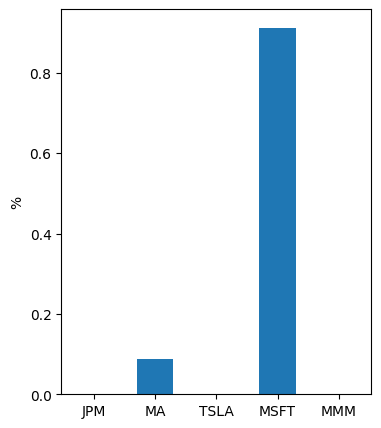

In [ ]:
figura=plt.figure(figsize=(4,5))
plt.bar(activos,wpt,width=0.6)
plt.ylabel("%")
plt.show()

In [ ]:
wpt

array([ 4.08613789e-21,  8.71713638e-02,  7.20993048e-21,  9.12828636e-01,
       -1.47248817e-20])

In [ ]:
wpt_total = wpt[0] + wpt[1] + wpt[2] + wpt[3] + wpt[4]
wpt_total

1.0

Se comprueba que la suma de los pesos es igual a 1.

Plano Riesgo - Retorno

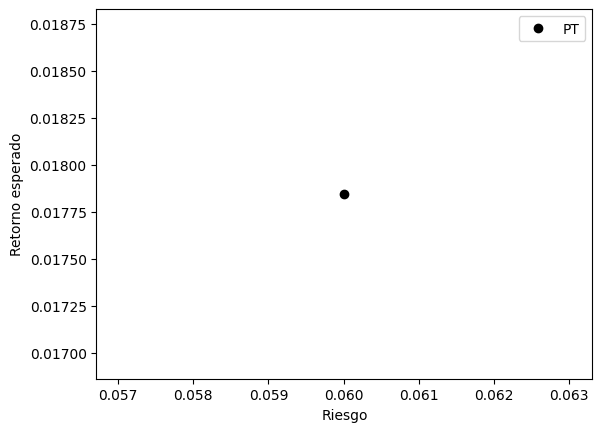

In [ ]:
plt.plot(sigmapt, rpt, 'ko', label='PT')
plt.ylabel("Retorno esperado")
plt.xlabel("Riesgo") 
plt.legend()

b. Calcular el VaR del portafolio para los niveles de confianza del 95% y 99%. Usar el
modelo estándar o paramétrico.

In [ ]:
activos = ["JPM","MA","TSLA","MSFT","MMM"]
precios = yf.download(activos, start='2017-12-01', end='2022-12-31', interval='1Mo')['Adj Close']
retornos = np.log(precios/precios.shift()).dropna()
mu = retornos.mean()
cov = retornos.cov()
sigma = retornos.std()


[*********************100%***********************]  5 of 5 completed


<Axes: >

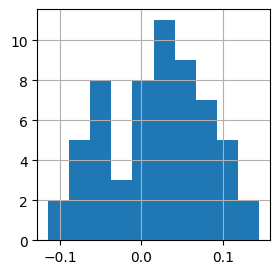

In [ ]:
#Retornos historicos
returns = retornos @ wpt
returns.hist(figsize=(3,3))

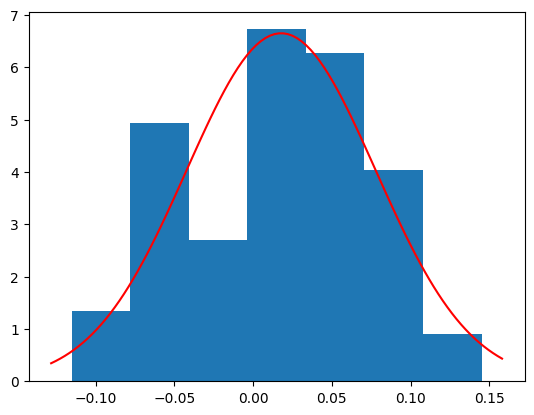

In [ ]:
rp=returns.mean()
sigmp=returns.std()
rp,sigmp
plt.hist(returns,bins="sturges",density=True)
xmin,xmax=plt.xlim()
c_3=np.linspace(xmin,xmax,100)
ptr=norm.pdf(c_3,rp,sigmp)
plt.plot(c_3,ptr,"r");

In [ ]:
# VaR Paramétrico 5%
rp = returns.mean()
sigmap = returns.std()

alpha = 0.05
VaRp5 = rp - norm.ppf(1-alpha)*sigmap 
VaRp5

-0.08086508399793484

In [ ]:
# VaR Paramétrico 1%
rp = returns.mean()
sigmap = returns.std()

alpha = 0.01
 
VaRp = rp - norm.ppf(1-alpha)*sigmap 
VaRp

-0.12176271598451144

Con un VaR parametrico para un alpha del 5%, hay una maxima perdida potencial esperada del -0.0808650127, y para un alpha del 1% su maxima perdida potencial esperada es -0.121762615. 

C. Calcular el VaR del portafolio para los niveles de confianza del 95% y 99%. Usar el
modelo de estimación histórica.

In [ ]:
#95% de confianza
var_historico2=np.percentile(returns,5)
var_historico2

-0.07323258743851625

In [ ]:
#99% de confianza
var_historico=np.percentile(returns,1)
var_historico

-0.10302772857215559

con un VaR de estimación histórica para un alpha del 5%, hay una maxima perdida potencial esperada del -0.0732325, y para un alpha del 1% su maxima perdida potencial esperada es -0.1030276692.

d. 
Utilice el método de Monte Carlo para construir una muestra aleatoria de 10.000
portafolios. Con esta muestra aleatoria calcular el VaR de simulación del portafolio.

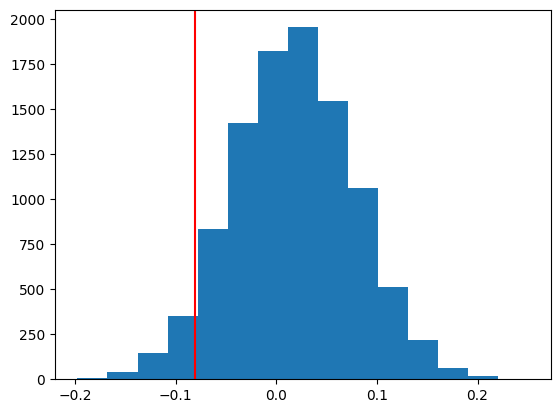

In [ ]:
rands = np.random.normal(rp, sigmap, 10000)
alpha = 0.05
mup=rands.mean()
sigmapor=rands.std()
VaRpor = mup - norm.ppf(1-alpha)*sigmapor 
plt.hist(rands,bins="sturges")
plt.axvline(VaRp5, color='r', label='VaR');

e. ¿Se encuentran diferencias significativas entre este portafolio óptimo construido a partir
de Monte Carlo y el portafolio tangente de la optimización?

In [ ]:
VaRpor

-0.08205504735540761

In [ ]:
VaRp5

-0.08086508399793484

El VaR del portafolio óptimo construido a partir del modelo Monte Carlo es -0.082, mientras que el VaR del portafolio tangente de la optimización es -0.080. Ambos valores son similares, sin embargo, la máxima pérdida esperada a una significancia del 5% es mayor en el portafolio tangente de la optimización 

Punto 3

A. Escoja una acción de su preferencia. Con la información histórica con cierre a Dic-2022,
estime los parámetros μ y σ.

In [ ]:
activo=("F")
precio_punto3=yf.download(activo,start="2017-12-01",end="2022-12-31",interval="1Mo")["Adj Close"]
retorno=np.log(precio_punto3/precio_punto3.shift()).dropna()
mu_punto3=retorno.mean()*12 #anualizar 
sigma_punto3 =retorno.std()*np.sqrt(12)

[*********************100%***********************]  1 of 1 completed


In [ ]:
#Estimación del parametro mu
mu_punto3

0.023265783131246425

In [ ]:
sigma_punto3

0.4316083715031859

Utilice el método de Monte Carlo para generar una muestra
aleatoria de 10.000 posibles valores del precio del activo en el instante t = 1.

In [ ]:
def PathsGBM(S0,mu_punto3,sigma_punto3,T,NS,M):    
    Z = np.random.normal(0.0,1.0,[NS,M])
    S = np.zeros([NS, M+1])
    S[:,0] = S0
    dt = T / M
    for t in range(0,M):
        S[:,t+1] = S[:,t] * np.exp((mu_punto3 - 0.5 * sigma_punto3 ** 2) * dt + sigma_punto3 * np.sqrt(dt) *Z[:,t])
    St = S 
    return St

In [ ]:
T = 1
mu_punto3 
sigma_punto3
S0 = precio_punto3[-1]
NS = 10000
M = 12 
St = PathsGBM(S0,mu_punto3,sigma_punto3,T,NS,M)


Presente
gráficamente las primeras 20 trayectorias del proceso. Corregir esto:)

Text(0.5, 0, 'Tiempo')

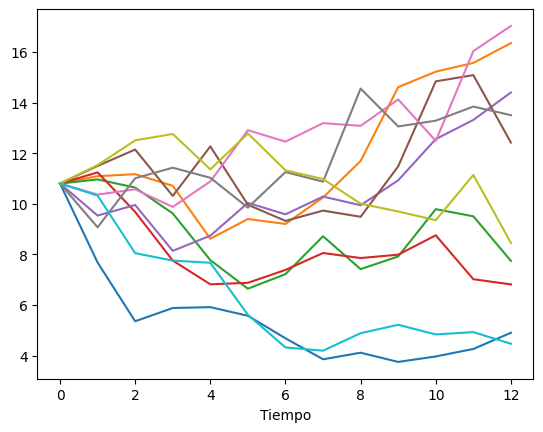

In [ ]:
plt.plot(np.transpose(St[:10])) 
plt.xlabel("Tiempo")

b. Construya el histograma de los precios y retornos al final del periodo (t = 1). ¿qué
puede concluir de la forma de los histogramas?

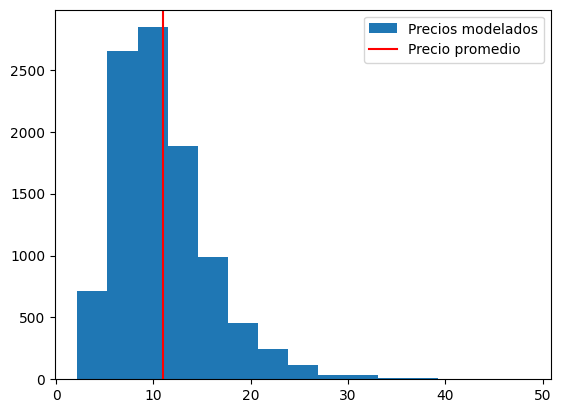

In [ ]:
plt.hist(St[:,-1], bins="sturges", label='Precios modelados')
plt.axvline(St[:,-1].mean(), color='r', label='Precio promedio')
plt.legend();


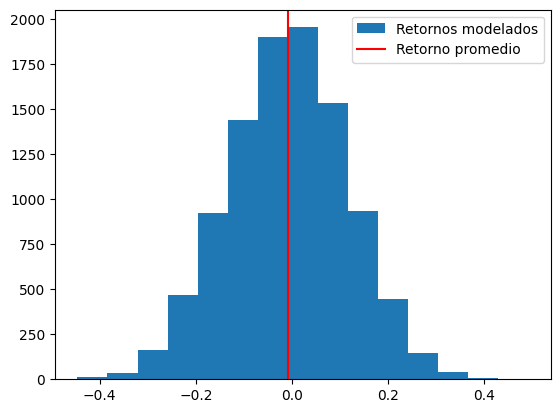

In [ ]:
rands_u=lhs(1,10000)
rands_n3 = norm(mu_punto3, sigma_punto3).ppf(rands_u)
NS=10000
M=12
St1=pd.DataFrame(St.T)
St3r=np.log(St/St.shift()).dropna()

plt.hist(St3r.iloc[-1], bins="sturges", label='Retornos modelados')
plt.axvline(St3r.iloc[-1].mean(), color='r', label='Retorno promedio')
plt.legend();


Conclusión: 

C. Demuestre que el valor terminal del precio simulado de la acción converge a
ST exp{(μ– 1/2σ
2
)}.

In [ ]:
S0 * np.exp((mu_punto3)* T)

11.059692502917907

In [ ]:
St[:,-1].mean()

11.102538381186521

Calcule la probabilidad de que el precio de la acción sea inferior a S0.

In [ ]:
retornos_datos=pd.DataFrame(retorno)
S01=retornos_datos.iloc[-1]
probabilidad =S01<0
probabilidad.value_counts()/NS

True    0.0001
Name: 2022-12-01 00:00:00, dtype: float64

Punto 4.  
Xt+dt = Xt + (μ–Xt)dt + σ(Wt+dt − Wt)

a. Utilice el método de Monte Carlo para realizar la simulacro de 10.000 posibles trayectorias de este proceso considerando los valores: 

X0 = 1, μ = 3, σ =0.3, T = 5, n = 100, dt = T/n.

In [ ]:
def PathsOU(S0,mu,sigma,T,NS,n,k):    
    Z = np.random.normal(0,1,[NS,n])
    S = np.zeros([NS, n+1])
    S[:,0] = S0
    dt = np.array([T / n])
    for t in range(0,n):
      drift = k * (mu - S[:,t])
      diffusion = sigma
      noise = np.sqrt(dt) * np.random.normal(0, 1, [NS, 1])
      S[:,t+1] = S[:,t] + drift * dt + diffusion * np.multiply(S[:,t], noise[:,0])
    return S

In [ ]:
T=5
mu=3
sigma=0.3
S0=1
k=1
NS = 10000 
n = 60 
Stou = PathsOU(S0,mu,sigma,T,NS,n,k)
Stou

array([[1.        , 1.33315961, 1.43316818, ..., 2.61790359, 2.49173629,
        2.19347828],
       [1.        , 1.07066759, 1.28162468, ..., 4.64184982, 3.97029437,
        3.97124151],
       [1.        , 1.27462724, 1.26731355, ..., 3.46075853, 3.84618499,
        3.37899516],
       ...,
       [1.        , 1.06102527, 1.14308959, ..., 2.27277234, 1.99053653,
        1.95608791],
       [1.        , 1.18607621, 1.39961026, ..., 2.04782231, 2.15062267,
        2.07168352],
       [1.        , 1.11177883, 1.34793241, ..., 2.89165633, 2.97146841,
        2.95241856]])

Text(0.5, 0, 'Tiempo')

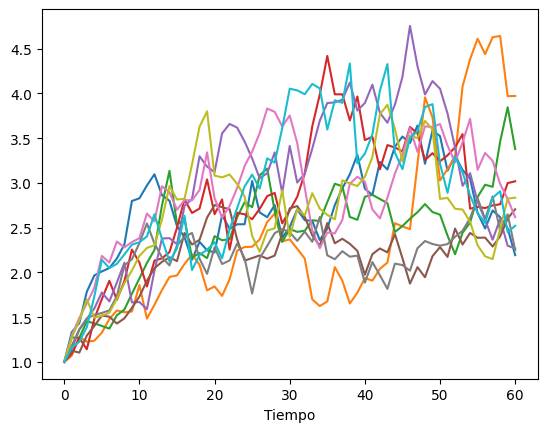

In [ ]:
#Grafica con todas las 10 primeras trayectorias
plt.plot(np.transpose(Stou[:10])) 
plt.xlabel("Tiempo")

b. A partir de los observado en las simulaciones realizadas en el punto anterior, ¿qué
puede concluir acerca del valor esperado y la varianza del proceso Ornstein-Uhlenbeck en
el largo plazo?

In [ ]:
#Valor esperado LP
Stou[:,-1].mean()


2.98740441877163

In [ ]:
mu = 3
sigma = 0.3
k = 1
S0 = 1
t = 1

# Calcular el valor esperado y la varianza
E_Xt = mu + (S0 - mu) * np.exp(-k*t)

Var_Xt = (sigma**2 / (2*k)) * (1 - np.exp(-2*k*t))
E_Xt

2.2642411176571153

In [ ]:
#Volatilidad  a LP
Stou[:,-1].std()


0.6582121452781565

In [ ]:
#Varianza a LP 
Stou[:,-1].var()

0.433243228191673

Se puede concluir que tanto la volatilidad como el valor esperado de largo plazo son similares a los del proceso, dado que la simulación se hace un número de muestra "grande" (10.000 trayectorias). Sin embargo, nos abstenemos de hacer el análisis de cuanto es la distancia entre los parámetros calculados porque el valor de cada simulación es diferente.

c. De acuerdo con la ecuación 1, ¿cuál es la distribución de probabilidad del proceso Ornstein-Uhlenbeck?

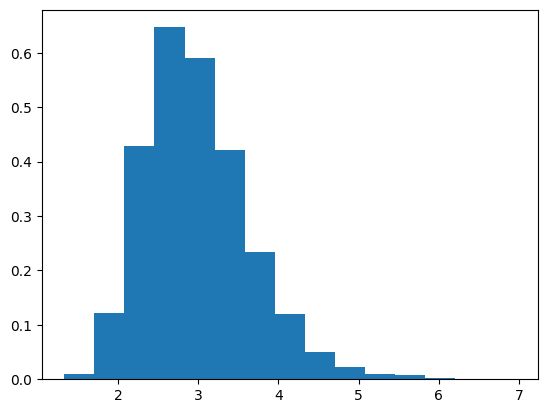

In [ ]:
tray = Stou[:,-1]
rp=mu
sigmp=sigma
plt.hist(tray,bins="sturges",density=True)
plt.show()
#La distribución se evidencia que es normal

d. El proceso Ornstein-Uhlenbeck se suelen utilizar para modelar la dinámica de la tasa corta de interés. Por ejemplo, si rt denota el valor de la tasa corte de interés en el
mercado, esta se puede modelar como:
rt+dt = rt + (μ– rt)dt + σ(Wt+dt − Wt)

Teniendo en cuenta los siguientes parámetros: r0 = 0. 03, μ = 0. 05, σ = 0. 15, T =1, n = 1000, dt = T/n; simule 100 posibles valores de la tasa de corta en el instante
T = 1, y utilice el valor promedio obtenido para valorar un bono cero cupón y facial 100
con vencimiento en T = 1.

In [ ]:
#La formula es la misma pero con r
r0 = 0.03 
T = 1 
mu =0.05  
sigma = 0.15
M=12
NS=100
k=1
Str = PathsOU(r0,mu,sigma,T,NS,M,k)
Str

array([[0.03      , 0.03527662, 0.03927762, ..., 0.04891664, 0.04972124,
        0.05136711],
       [0.03      , 0.03122492, 0.03295633, ..., 0.04269063, 0.04405852,
        0.04365028],
       [0.03      , 0.03215205, 0.03378369, ..., 0.0427251 , 0.04380142,
        0.04607554],
       ...,
       [0.03      , 0.03200911, 0.03393459, ..., 0.04470561, 0.04537398,
        0.04554106],
       [0.03      , 0.0336819 , 0.03375128, ..., 0.04752241, 0.04592841,
        0.04623846],
       [0.03      , 0.02986852, 0.03209532, ..., 0.04262881, 0.04308975,
        0.04219249]])

Presente gráficamente las 10 primeras trayectorias del proceso

Text(0.5, 0, 'Tiempo')

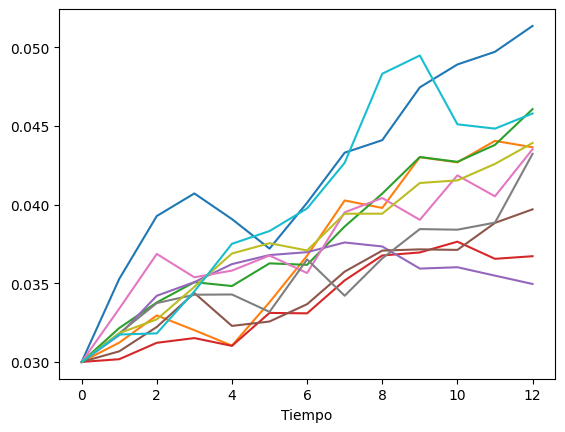

In [ ]:
plt.plot(np.transpose(Str[:10])) 
plt.xlabel("Tiempo")

Punto 5.

Con la información de las series históricas para el periodo 2005-01-01 a 2022-12-31 con
periodicidad mensual, construya 100 trayectorias o simulaciones para cada serie para el
año 2023. Para este ejercicio tenga en cuenta que las series pueden seguir un proceso
estocástico tipo GMB o de reversión a la media tipo OU.

a. La gráfica de las series históricas de los precios

[*********************100%***********************]  3 of 3 completed


<Axes: xlabel='Date'>

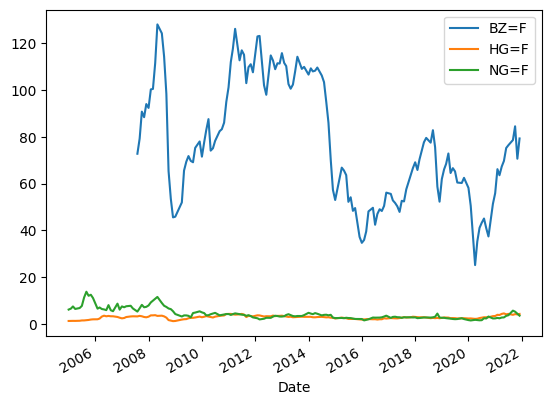

In [ ]:
#Activos escogidos 
#Cooper (HG=F)
#Natural gas (NG=F)
#Brent Oil futures (BZ=F)
activos_punto5 = [ "HG=F" ,"NG=F", "BZ=F"]
precio_punto5 =yf.download(activos_punto5,start= "2005-01-01",end="2021-12-31",interval="1Mo")["Adj Close"]
precio_punto5.plot()

[*********************100%***********************]  1 of 1 completed


<Axes: xlabel='Date'>

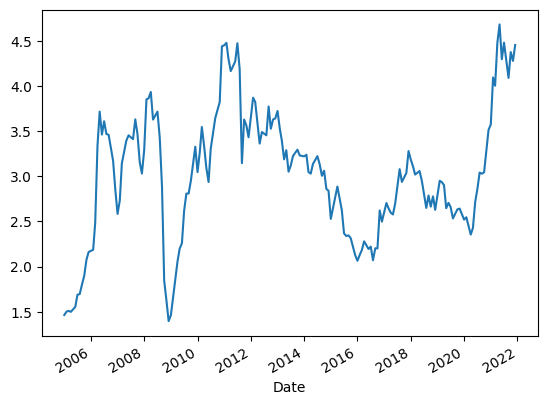

In [ ]:
cooper = yf.download("HG=F",start="2005-01-01",end="2021-12-31",interval="1Mo")
cooper = cooper.loc[:,("Adj Close")].dropna()
cooper.plot()

[*********************100%***********************]  1 of 1 completed


<Axes: xlabel='Date'>

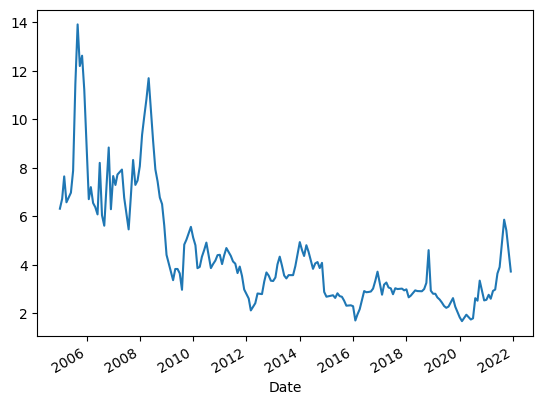

In [ ]:
natural_gas = yf.download("NG=F",start="2005-01-01",end="2021-12-31",interval="1Mo")
natural_gas = natural_gas.loc[:,("Adj Close")].dropna()
natural_gas.plot()

[*********************100%***********************]  1 of 1 completed


<Axes: xlabel='Date'>

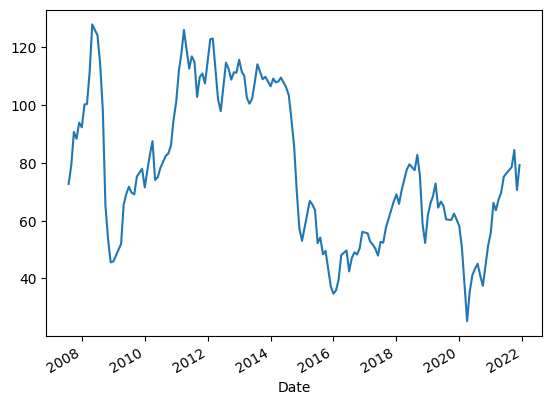

In [ ]:
brent = yf.download("BZ=F",start="2005-01-01",end="2021-12-31",interval="1Mo")
brent = brent.loc[:,("Adj Close")].dropna()
brent.plot()

Retornos

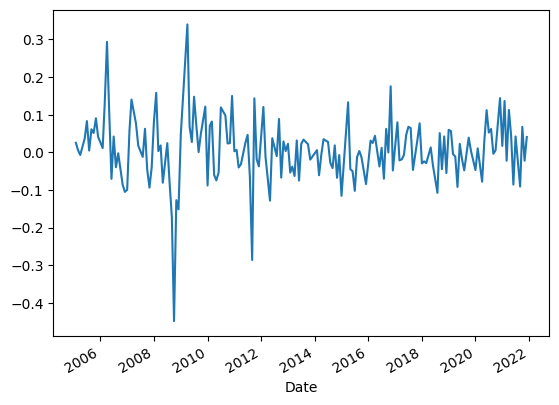

In [ ]:
#Retornos cooper
retornoscooper=np.log(cooper/cooper.shift()).dropna()
retornoscooper.plot();

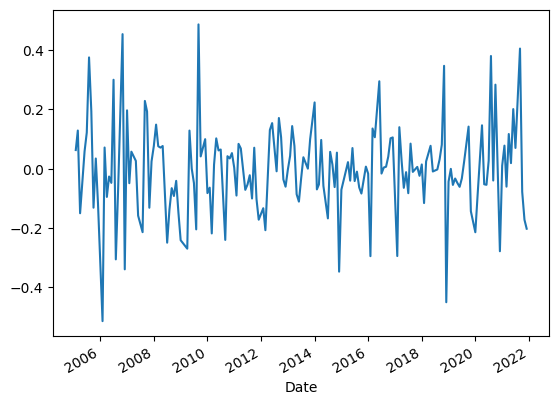

In [ ]:
#Retornos Natural gas
retornosnatural_gas=np.log(natural_gas/natural_gas.shift()).dropna()
retornosnatural_gas.plot();

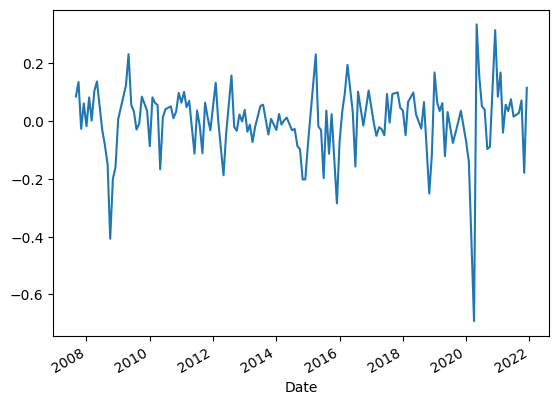

In [ ]:
#Retornos BRENT
retornosbrent=np.log(brent/brent.shift()).dropna()
retornosbrent.plot();

b. Presente los resultados de las pruebas de estacionariedad de Dickey-Fuller (ADF)

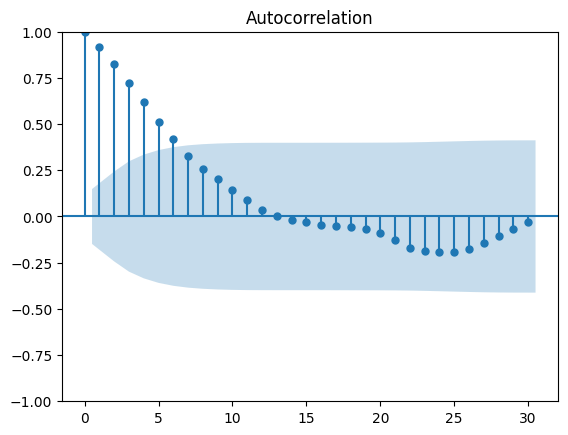

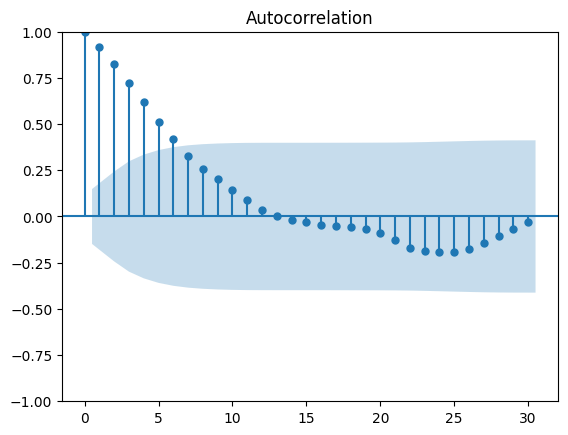

In [ ]:
plot_acf(cooper, lags=30)

In [ ]:
from statsmodels.tsa.stattools import adfuller

In [ ]:
pruebacooper = adfuller(cooper)
print('ADF Statistic: %f' % pruebacooper[0])
print('p-value: %f' % pruebacooper[1])
print('Critical Values:')
for key, value in pruebacooper[4].items():
	print('\t%s: %.5f' % (key, value))

ADF Statistic: -2.378560
p-value: 0.147879
Critical Values:
	1%: -3.46873
	5%: -2.87840
	10%: -2.57576


Los precios del cooper no son estacionarios debido a que el valor p  es mayor a la significancia (95%), además, el valor crítico es mayor al valor del test de DF

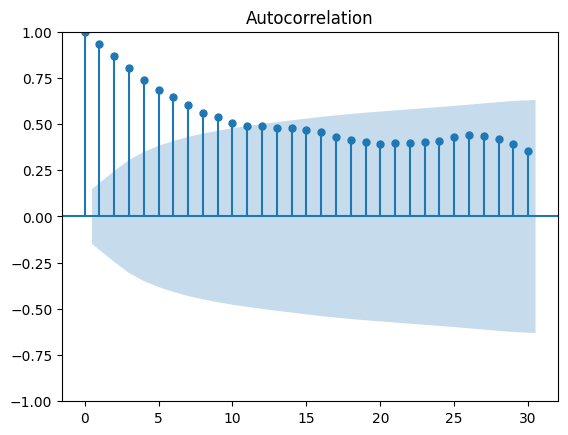

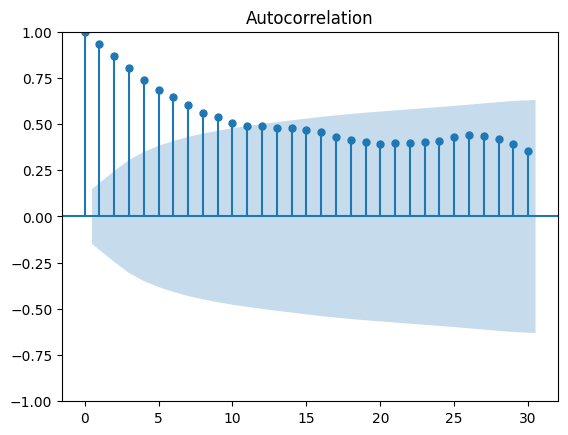

In [ ]:
plot_acf(natural_gas, lags=30)

In [ ]:
pruebanaturalgas = adfuller(natural_gas)
print('ADF Statistic: %f' % pruebanaturalgas[0])
print('p-value: %f' % pruebanaturalgas[1])
print('Critical Values:')
for key, value in pruebanaturalgas[4].items():
	print('\t%s: %.5f' % (key, value))

ADF Statistic: -2.974425
p-value: 0.037353
Critical Values:
	1%: -3.47062
	5%: -2.87922
	10%: -2.57620


Los precios del natural gas si son estacionarios debido a que el valor p  es menor a la significancia (95%), así mismo,  el valor crítico es menor al valor del test de DF

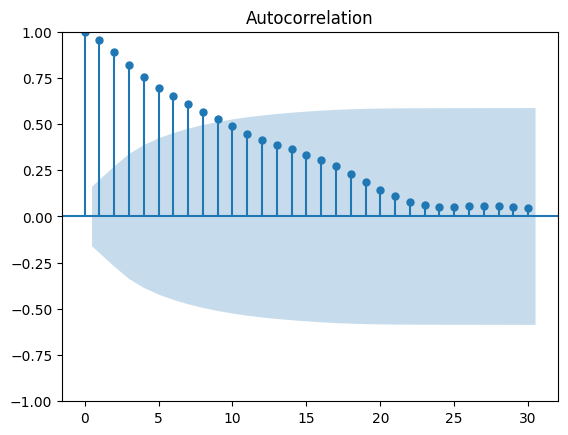

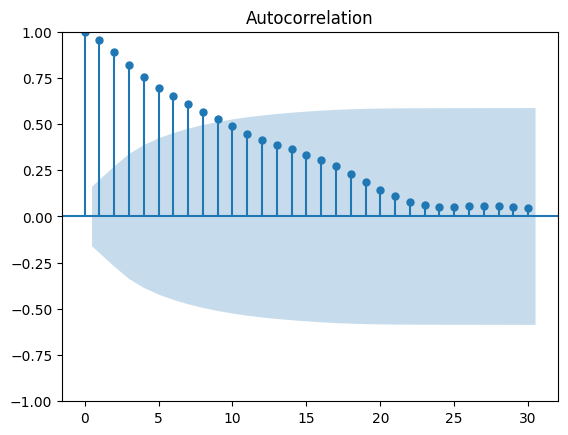

In [ ]:
plot_acf(brent, lags=30)

In [ ]:
pruebabrent= adfuller(brent)
# Para ajustar la salida de resultados
print('ADF Statistic: %f' % pruebabrent[0])
print('p-value: %f' % pruebabrent[1])
print('Critical Values:')
for key, value in pruebabrent[4].items():
	print('\t%s: %.5f' % (key, value))

ADF Statistic: -2.342987
p-value: 0.158478
Critical Values:
	1%: -3.47595
	5%: -2.88155
	10%: -2.57744


Los precios del brent no son estacionarios debido a que el valor p  es mayor a la significancia, también, el valor crítico es mayor al valor del test de DF

In [ ]:
#Transformo las series en estacionarias, entonces trabajo con los retornos
pruebacooper = adfuller(retornoscooper)
print('ADF Statistic: %f' % pruebacooper[0])
print('p-value: %f' % pruebacooper[1])
print('Critical Values:')
for key, value in pruebacooper[4].items():
	print('\t%s: %.5f' % (key, value))

ADF Statistic: -10.645367
p-value: 0.000000
Critical Values:
	1%: -3.46895
	5%: -2.87850
	10%: -2.57581


In [ ]:
pruebabrent = adfuller(retornosbrent)
print('ADF Statistic: %f' % pruebacooper[0])
print('p-value: %f' % pruebacooper[1])
print('Critical Values:')
for key, value in pruebacooper[4].items():
	print('\t%s: %.5f' % (key, value))

ADF Statistic: -10.645367
p-value: 0.000000
Critical Values:
	1%: -3.46895
	5%: -2.87850
	10%: -2.57581


Construya 100 trayectorias o simulaciones para cada serie del 2023. (MGB o OU)
c. Los resultados de la simulación

Para gas natural -- Si es estacionaria -- OU

In [ ]:
def PathsOU(S0,mu,sigma,T,NS,M,k):    
    Z = np.random.normal(0,1,[NS,M])
    S = np.zeros([NS, M+1])
    S[:,0] = S0
    dt = np.array([T / M])
    for t in range(0,M):
      drift = k * (mu - S[:,t])
      diffusion = sigma
      noise = np.sqrt(dt) * np.random.normal(0, 1, [NS, 1])
      S[:,t+1] = S[:,t] + drift * dt + diffusion * np.multiply(S[:,t], noise[:,0])
    return S

In [ ]:
T=1 # Anual
mugas= retornosnatural_gas.mean()*12
sigmagas= retornosnatural_gas.std()*np.sqrt(12)
S0= natural_gas[-1]
k=1
NS = 100 
M = 12 
Stgas = PathsOU(S0,mugas,sigmagas,T,NS,M,k)

Text(0.5, 0, 'Tiempo')

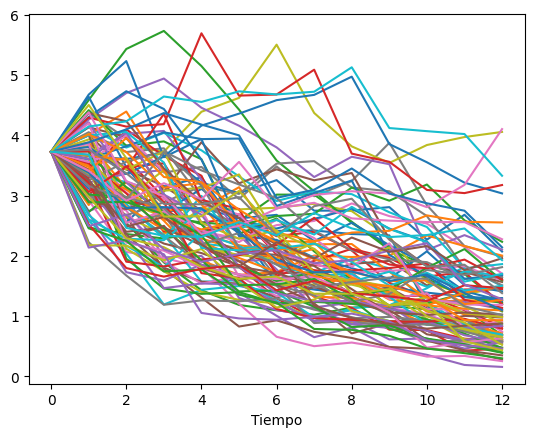

In [ ]:
plt.plot(np.transpose(Stgas)) 
#Grafico la matriz forma columna
plt.xlabel("Tiempo")


Para cooper -- No estacionario -- GMB


In [ ]:
def PathsGBM(S0,mu,sigma,T,NS,M):    
    Z = np.random.normal(0.0,1.0,[NS,M])
    S = np.zeros([NS, M+1])
    S[:,0] = S0
    dt = T / M
    for t in range(0,M):
        S[:,t+1] = S[:,t] * np.exp((mu - 0.5 * sigma ** 2) * dt + sigma * np.sqrt(dt) *Z[:,t])  #Esto garantiza que la varianza sea determinada por el termino t
    return S
    

In [ ]:
T=1 # Anual
#Los parametros TIENEN QUE ESTAR ANUALIZADOS, MU Y SIGMA
muc= retornoscooper.mean()*12
sigmac= retornoscooper.std()*np.sqrt(12)
S0= cooper[-1]
NS = 100  # Número de trayectorias
M = 12 # Partición del año en días
StCooper = PathsGBM(S0,muc,sigmac,T,NS,M)

Text(0.5, 0, 'Tiempo')

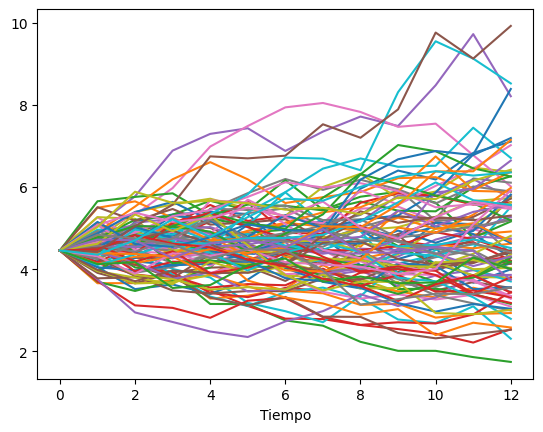

In [ ]:
plt.plot(np.transpose(StCooper)) 
#Grafico la matriz forma columna
plt.xlabel("Tiempo")

Para brent -- No estacionarios -- GMB


In [ ]:
T=1 # Anual
#Los parametros TIENEN QUE ESTAR ANUALIZADOS, MU Y SIGMA
mub= retornosbrent.mean()*12
sigmab= retornosbrent.std()*np.sqrt(12)
S0= brent[-1]
NS = 100  # Número de trayectorias
M = 12 # Partición del año en días
StBrent = PathsGBM(S0,mub,sigmab,T,NS,M)

Text(0.5, 0, 'Tiempo')

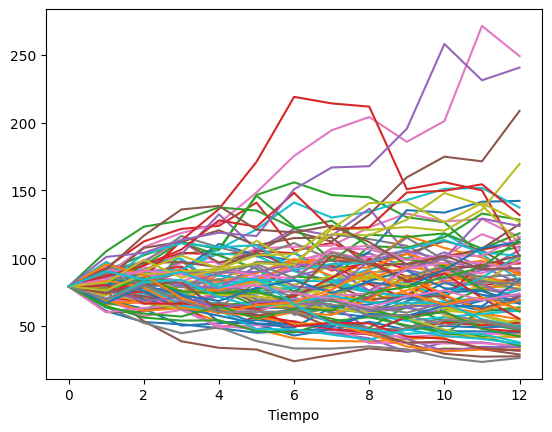

In [ ]:
plt.plot(np.transpose(StBrent)) 
#Grafico la matriz forma columna
plt.xlabel("Tiempo")